In [6]:
!pip install pycuda
!pip install nltk
!wget http://delaram.lmu.build/courses/cmsi-185/Final/abcnews-date-text.csv


/bin/bash: import: command not found
/bin/bash: -c: line 0: syntax error near unexpected token `'punkt''
/bin/bash: -c: line 0: `nltk.download('punkt')'


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


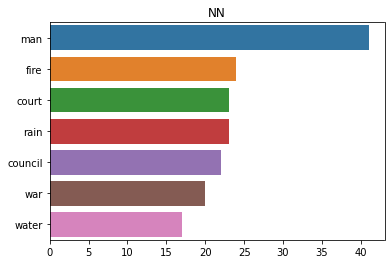

In [3]:
import pandas as pd
news= pd.read_csv('abcnews-date-text.csv',nrows=1000)

import nltk
from nltk.tokenize import word_tokenize
import seaborn as sns
from collections import Counter

#@cuda.jit(nopython=True)
def plot_most_common_part_of_speach_barchart(text, part_of_speach='NN'):
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    
    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speach)

blockdim = (16, 16)

griddim = (1,1,1)
#plot_most_common_part_of_speach_barchart[griddim, blockdim](news['headline_text'])
plot_most_common_part_of_speach_barchart(news['headline_text'])